# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 
        
        
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | igarapava
Processing Record 7 of Set 1 | escanaba
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | mianyang
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | sumbawa besar
Processing Record 14 of Set 1 | gunjur
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | coffeyville
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | atamanovka
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,25.91,80,89,0.45,US,1724858868
1,arraial do cabo,-22.9661,-42.0278,23.98,46,20,4.12,BR,1724858791
2,margaret river,-33.9500,115.0667,17.34,85,100,11.21,AU,1724858791
3,hermanus,-34.4187,19.2345,9.89,56,93,6.74,ZA,1724859064
4,longyearbyen,78.2186,15.6401,7.91,61,0,5.14,SJ,1724858877


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,25.91,80,89,0.45,US,1724858868
1,arraial do cabo,-22.9661,-42.0278,23.98,46,20,4.12,BR,1724858791
2,margaret river,-33.9500,115.0667,17.34,85,100,11.21,AU,1724858791
3,hermanus,-34.4187,19.2345,9.89,56,93,6.74,ZA,1724859064
4,longyearbyen,78.2186,15.6401,7.91,61,0,5.14,SJ,1724858877


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

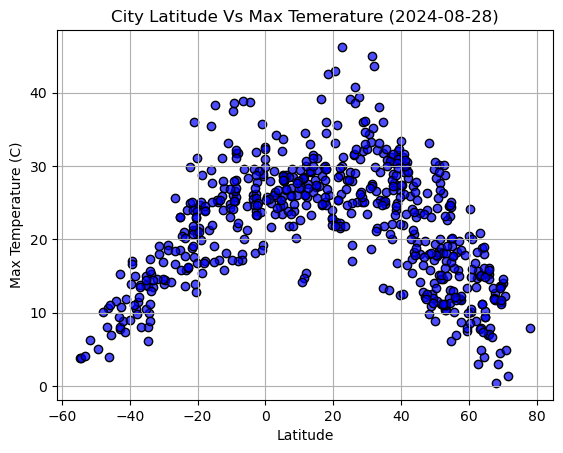

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"],c=("blue",0.7),edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible = True)
plt.title("City Latitude Vs Max Temerature (2024-08-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

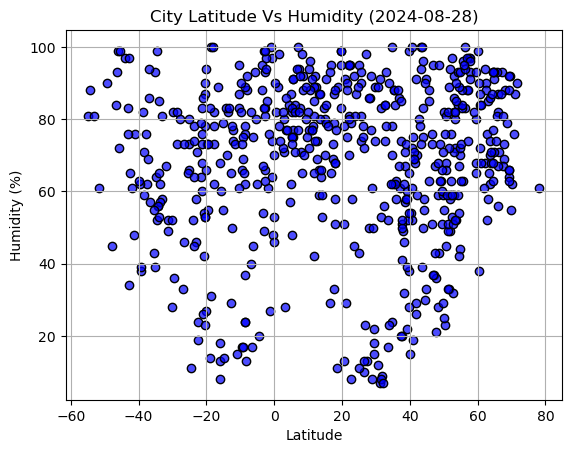

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"],c=("blue",0.7),edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible = True)
plt.title("City Latitude Vs Humidity (2024-08-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

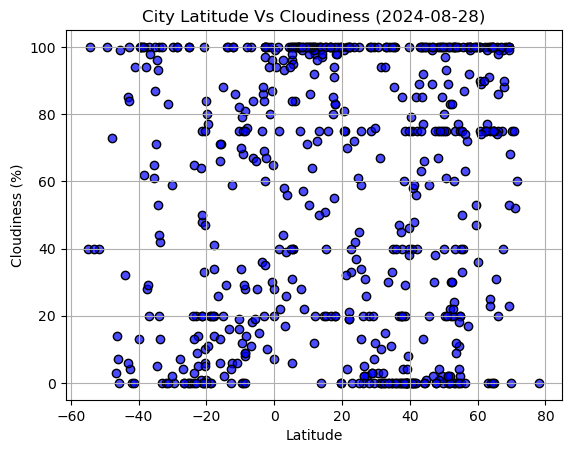

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"],c=("blue",0.7),edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible = True)
plt.title("City Latitude Vs Cloudiness (2024-08-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

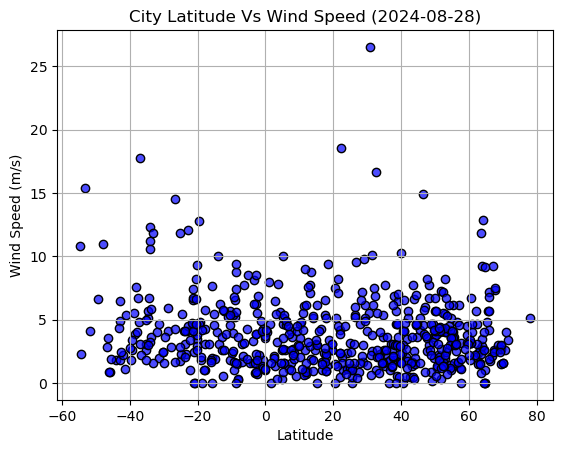

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"],c=("blue",0.7),edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible = True)
plt.title("City Latitude Vs Wind Speed (2024-08-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x,y,loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,loc,fontsize=15,color="red")
    

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,25.91,80,89,0.45,US,1724858868
4,longyearbyen,78.2186,15.6401,7.91,61,0,5.14,SJ,1724858877
6,escanaba,45.7453,-87.0646,17.98,88,100,5.14,US,1724858971
8,mianyang,31.4593,104.7542,27.55,83,94,2.52,CN,1724859070
9,stanley,54.8680,-1.6985,20.10,70,20,3.60,GB,1724859071


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,23.98,46,20,4.12,BR,1724858791
2,margaret river,-33.9500,115.0667,17.34,85,100,11.21,AU,1724858791
3,hermanus,-34.4187,19.2345,9.89,56,93,6.74,ZA,1724859064
5,igarapava,-20.0383,-47.7469,31.12,27,1,3.50,BR,1724858825
7,edinburgh of the seven seas,-37.0676,-12.3116,13.82,86,100,17.78,SH,1724858807


###  Temperature vs. Latitude Linear Regression Plot

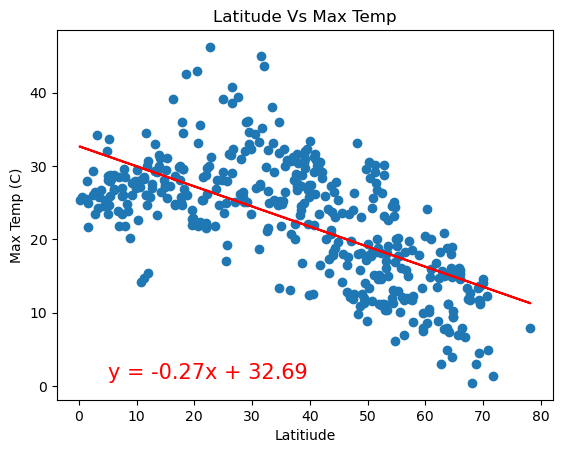

In [56]:
# Linear regression on Northern Hemisphere
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(5,1))
plt.title("Latitude Vs Max Temp")
plt.xlabel("Latitiude")
plt.ylabel("Max Temp (C)")
plt.show()

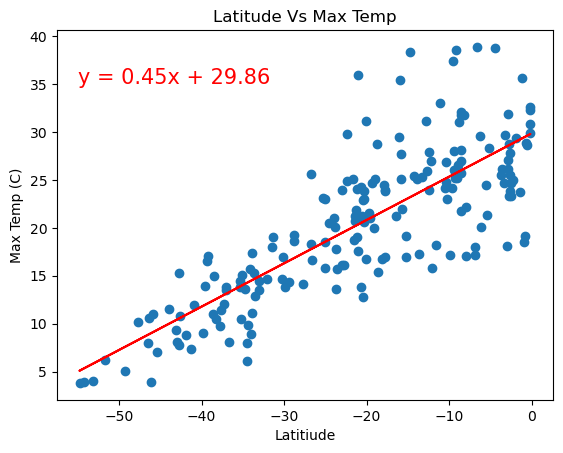

In [57]:
# Linear regression on Southern Hemisphere
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(-55,35))
plt.title("Latitude Vs Max Temp")
plt.xlabel("Latitiude")
plt.ylabel("Max Temp (C)")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

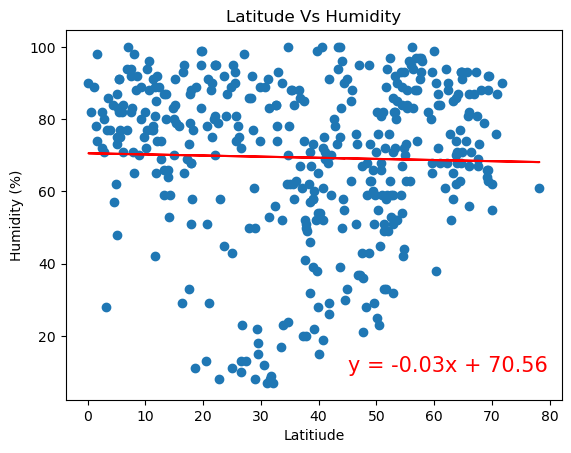

In [62]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(45,10))
plt.title("Latitude Vs Humidity")
plt.xlabel("Latitiude")
plt.ylabel("Humidity (%)")
plt.show()

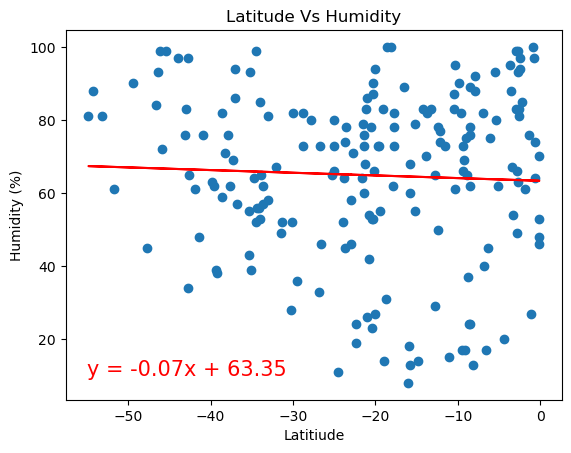

In [61]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(-55,10))
plt.title("Latitude Vs Humidity")
plt.xlabel("Latitiude")
plt.ylabel("Humidity (%)")
plt.show()

In [ ]:
# Discussion about the linear relationship: There is no apparent correlation between latitude and humidity in either hemiphere

### Cloudiness vs. Latitude Linear Regression Plot

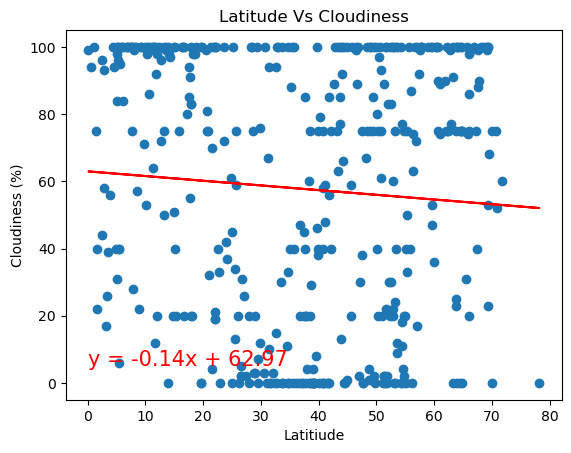

In [67]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(0,5))
plt.title("Latitude Vs Cloudiness")
plt.xlabel("Latitiude")
plt.ylabel("Cloudiness (%)")
plt.show()

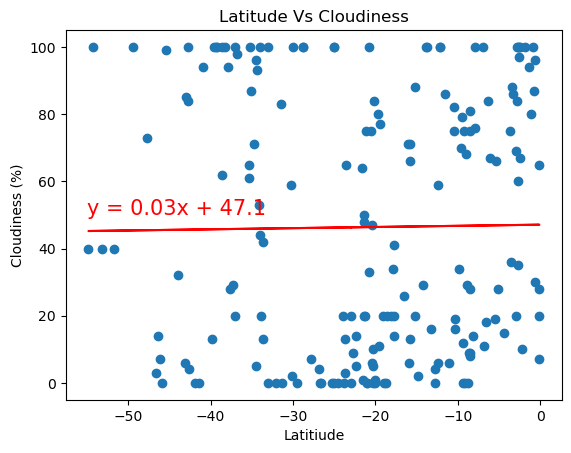

In [70]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(-55,50))
plt.title("Latitude Vs Cloudiness")
plt.xlabel("Latitiude")
plt.ylabel("Cloudiness (%)")
plt.show()

In [ ]:
# Discussion about the linear relationship: There is no apparent correlation bewteen latitude and cloudiness in either hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

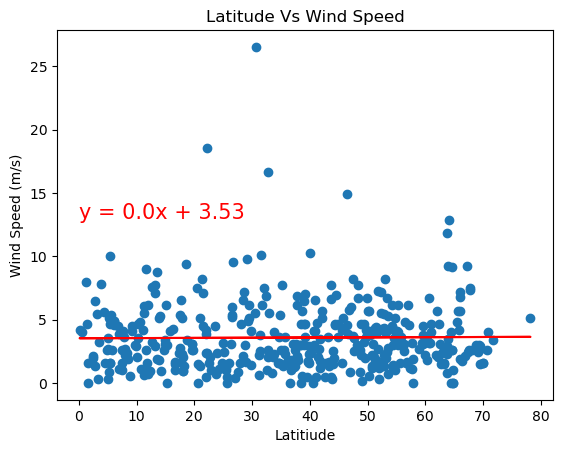

In [73]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(0,13))
plt.title("Latitude Vs Wind Speed")
plt.xlabel("Latitiude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

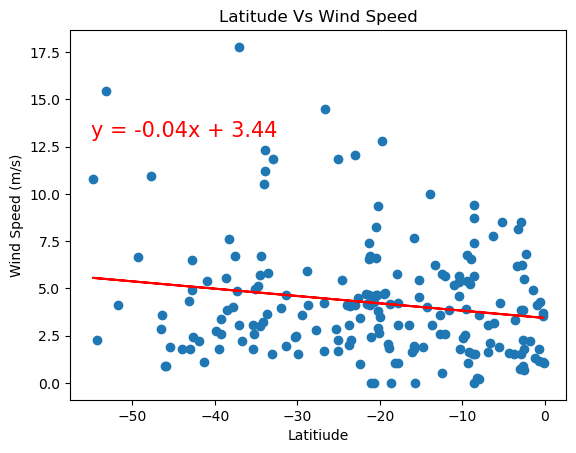

In [75]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(-55,13))
plt.title("Latitude Vs Wind Speed")
plt.xlabel("Latitiude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

In [ ]:
# Discussion about the linear relationship: There is no apparent correlation bewteen latitude and wind speed in either hemisphere